# Setup and Load Data

#### 1.1 Install Dependences and Setup

!pip install tensorflow opencv-python matplotlib

# Import Libiraries

In [4]:
import tensorflow as tf
import os

#### os. path. 
join combines path names into one complete path. This means that you can merge multiple parts of a path into one, instead of hard-coding every path name manually.

In [5]:
os.path.join('data','happy')

'data/happy'

In [6]:
os.listdir('data')

['happy', 'sad']

In [7]:
gpus=tf.config.experimental.list_physical_devices('GPU')

In [8]:
gpus

[]

In [9]:
len(gpus)

0

In [10]:
#avoid OOM errors by setting gpu memory consuption      keep it minimum
#I will use collab
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [11]:
#download all images extension

In [12]:
import cv2
import imghdr

In [13]:
data_dir='Data'

In [14]:
images_exts=['jpeg','jpg','bmp','png']

In [15]:
os.listdir(os.path.join('Data','happy'))

['05-12-21-happy-people.jpg',
 'images4.jpeg',
 'images3.jpeg',
 'images2.jpeg',
 '171120-smile-stock-njs-333p.jpg',
 'Happy-people-800x533.jpg']

In [16]:
os.listdir(os.path.join('Data'))

['happy', 'sad']

In [17]:
#!rm -r 'Data/.DS_Store'

In [18]:
#!rm -r 'Data/.ipynb_checkpoints'

In [19]:
os.listdir(os.path.join('Data'))

['happy', 'sad']

In [20]:
os.listdir(os.path.join('Data','sad'))

['yyUnknown.jpg',
 'uUnknown.jpg',
 'Unknow5n.jpg',
 'young-woman-looking-out-through-rain-covered-window.jpg',
 'GettyImages-648538841-cc95d7b3a4aa40678b02b28a56febd59.jpg']

In [21]:
!rm -r 'Data/sad/.ipynb_checkpoints'

rm: Data/sad/.ipynb_checkpoints: No such file or directory


(880, 1400, 3)
(182, 277, 3)
(183, 275, 3)
(174, 290, 3)
(470, 760, 3)
(533, 800, 3)
(183, 275, 3)
(183, 275, 3)
(174, 290, 3)
(924, 1541, 3)
(1124, 1500, 3)


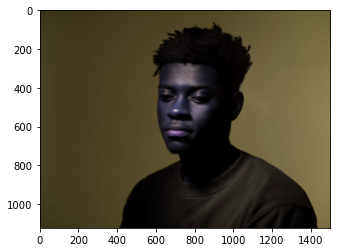

In [22]:
import matplotlib.pyplot as plt
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)#create sth like data/happy/image.jpg
        try:
            img=cv2.imread(image_path)
            print(img.shape)
            plt.imshow(img)
        except:
            print(image_path)

In [23]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in images_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            print(e)

# Load dataset

Great for checking the functions :tf.data.Dataset??

In [24]:
import numpy as np

In [25]:
tf.keras.utils.image_dataset_from_directory??

tf.keras.utils.image_dataset_from_directory('Data',batch_size=8,image_size=(128,128))

In [26]:
data=tf.keras.utils.image_dataset_from_directory('Data',batch_size=4)

Found 11 files belonging to 2 classes.


2023-01-11 14:03:20.368569: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
data_iterator=data.as_numpy_iterator()

In [28]:
batch=data_iterator.next()

In [29]:
batch[0].shape

(4, 256, 256, 3)

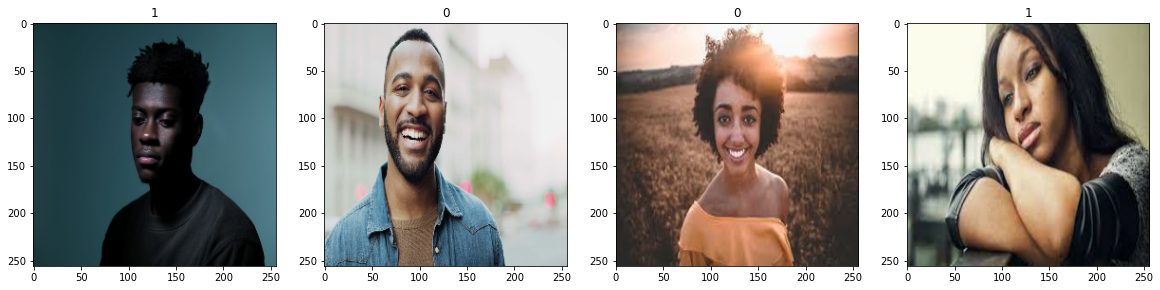

In [30]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocess Data

#### 1.Scale the data

In [31]:
# x is images and y is labels
data=data.map(lambda x,y:(x/255.0,y))

In [32]:
scaled_iterator=data.as_numpy_iterator()

In [33]:
batch=scaled_iterator.next()

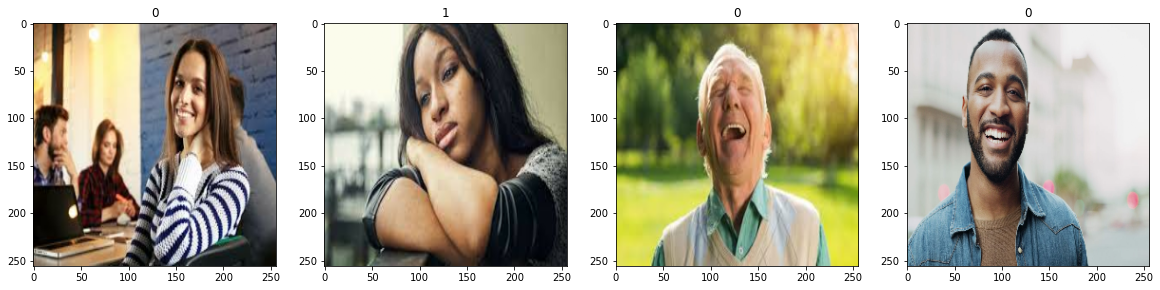

In [34]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [35]:
batch[0]

array([[[[0.49116114, 0.30292585, 0.15390626],
         [0.5161382 , 0.3293505 , 0.17984834],
         [0.53574604, 0.35927543, 0.20633425],
         ...,
         [0.29391083, 0.21940105, 0.23508732],
         [0.24307598, 0.16856618, 0.18425246],
         [0.27682292, 0.20231311, 0.21799938]],

        [[0.52402365, 0.33578834, 0.18676874],
         [0.53643703, 0.3496493 , 0.20014717],
         [0.5396765 , 0.3632059 , 0.21026474],
         ...,
         [0.31105575, 0.23791249, 0.25314325],
         [0.27530074, 0.20663461, 0.22037299],
         [0.31227103, 0.23803453, 0.2536297 ]],

        [[0.55457395, 0.36633867, 0.21731906],
         [0.5559251 , 0.36913744, 0.21936762],
         [0.54332685, 0.3668563 , 0.21173987],
         ...,
         [0.33759516, 0.26831484, 0.2823323 ],
         [0.32296026, 0.26012284, 0.27223626],
         [0.3591628 , 0.2883092 , 0.30279163]],

        ...,

        [[0.47971773, 0.39954004, 0.33287334],
         [0.51652557, 0.4370453 , 0.37037864]

### 2.2 Split the data

In [36]:
len(data)

3

In [37]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [38]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [39]:
val

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [40]:
from keras.models import Sequential
from keras.layers import Dense , Dropout, Flatten ,Conv2D,MaxPooling2D

In [41]:
model=Sequential()

In [42]:
#16 filter  3x3 have stride of one mean it can go throught every pixel one by one
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [43]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [44]:
#the zero mean no parameters here it's not a trainable layer
# the filter will less it down
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [45]:
logdir='logs'

In [46]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 1s 451ms/step - loss: 1.0016 - accuracy: 0.5000 - val_loss: 0.6235 - val_accuracy: 0.6667
Epoch 2/20
2/2 [==============================] - 0s 273ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.7384 - val_accuracy: 0.3333
Epoch 3/20
2/2 [==============================] - 1s 275ms/step - loss: 0.6964 - accuracy: 0.6250 - val_loss: 0.5967 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 0s 272ms/step - loss: 0.5445 - accuracy: 0.8750 - val_loss: 0.2796 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 0s 268ms/step - loss: 0.4047 - accuracy: 0.7500 - val_loss: 0.2394 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 1s 278ms/step - loss: 0.2560 - accuracy: 1.0000 - val_loss: 0.1640 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 0s 269ms/step - loss: 0.1603 - accuracy: 1.0000 - val_loss: 0.3651 - val_accuracy: 0.6667
Epoch 8/20
2/2 [====

In [48]:
hist.history

{'loss': [1.0015867948532104,
  0.6938357949256897,
  0.696374773979187,
  0.5444784164428711,
  0.40466824173927307,
  0.25595006346702576,
  0.16033786535263062,
  0.2211921364068985,
  0.14913028478622437,
  0.024917475879192352,
  0.09592004120349884,
  0.004876956343650818,
  0.06028539314866066,
  0.04673014208674431,
  0.02596820518374443,
  0.052111998200416565,
  0.020254263654351234,
  0.002559466753154993,
  0.003329181345179677,
  0.0031050541438162327],
 'accuracy': [0.5,
  0.5,
  0.625,
  0.875,
  0.75,
  1.0,
  1.0,
  0.875,
  0.875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6234530210494995,
  0.7384453415870667,
  0.5966535210609436,
  0.2796129882335663,
  0.23935306072235107,
  0.16397179663181305,
  0.36507606506347656,
  0.1314203143119812,
  0.008411906659603119,
  0.002787961857393384,
  0.004155786242336035,
  0.02169094979763031,
  0.07356028258800507,
  0.007255022879689932,
  0.0656476691365242,
  0.00660824

# plot

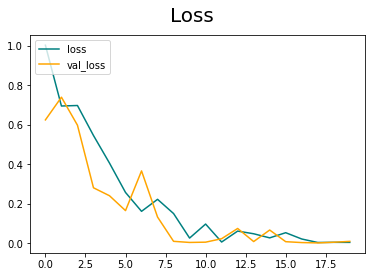

In [49]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

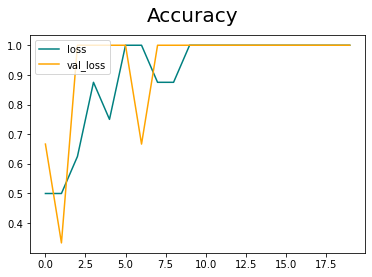

In [50]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='loss')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_loss')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

In [51]:
from tensorflow.keras.metrics import Precision,Recall, BinaryAccuracy

In [52]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [54]:
print(pre.result().numpy())
print(re.result().numpy())
print(acc.result().numpy())

0.0
0.0
0.0


# Test

In [55]:
img=cv2.imread('Data/happy/Happy-people-800x533.jpg')
img2=cv2.imread('Data/sad/GettyImages-648538841-cc95d7b3a4aa40678b02b28a56febd59.jpg')

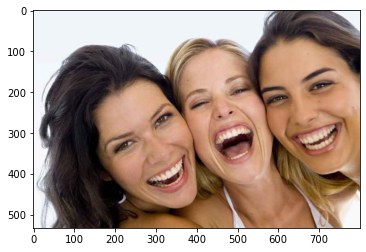

In [56]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

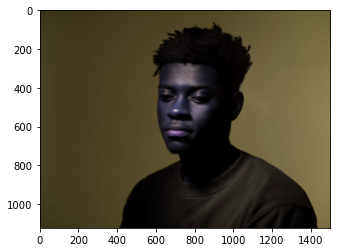

In [57]:
plt.imshow(img2)
plt.show()

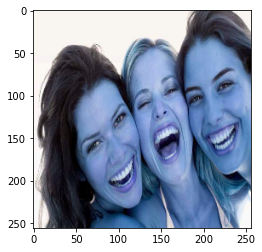

In [58]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

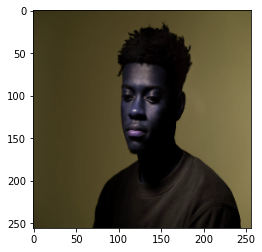

In [59]:
resize2=tf.image.resize(img2,(256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [60]:
yhat=model.predict(np.expand_dims(resize/255.0,0))
yhat2=model.predict(np.expand_dims(resize2/255.0,0))

1/1 [==============================] - 0s 30ms/step


In [61]:
yhat

array([[0.00032383]], dtype=float32)

In [62]:
yhat2

array([[0.16566399]], dtype=float32)

In [63]:
if yhat>0.5:
    print('Predict Class is sad')
else:
    print('Predicted class is happy')

Predicted class is happy


In [64]:
if yhat2>0.5:
    print('Predict Class is sad')
else:
    print('Predicted class is happy')

Predicted class is happy


In [65]:
img=cv2.imread('ME.jpg')

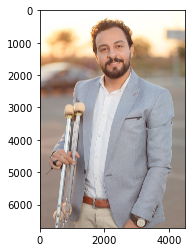

In [66]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [67]:
resize3=tf.image.resize(img,(256,256))
yhat=model.predict(np.expand_dims(resize3/255.0,0))

1/1 [==============================] - 0s 54ms/step


In [69]:
if yhat>0.5:
    print('Predict Class is sad')
else:
    print('Predicted class is happy')

Predicted class is happy
